In [1]:
import uproot
import awkward as ak
from coffea import nanoevents
import numpy as np
import pandas as pd

import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

In [2]:
file = pd.read_parquet(f'../outfiles/0-1_ele.parquet')
# file = pd.read_parquet(f'/eos/uscms/store/user/aaportel/boostedhiggs/dec_4_top_2016_2016/TTToSemiLeptonic/outfiles/0-10_ele.parquet')

In [3]:
temp = file.dropna(how='all')
temp

,MET,tau32,lep_fatjetPt,lep_fatjetEta,lep_fatjetPhi,lep_fatjetMass,had_fatjetPt,had_fatjetEta,had_fatjetPhi,had_fatjetMass,lepPt,lepEta,lepPhi,lepMass,had_subjetPt,had_subjetEta,had_subjetPhi,had_subjetMass,had_subjetBscore
0,59.263496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.295425,0.582397,0.288513,0.008026,NaN,NaN,NaN,NaN,NaN
1,45.116871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.434395,1.062256,-1.279785,0.030151,NaN,NaN,NaN,NaN,NaN
2,20.040844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.985584,1.136719,-1.242188,0.013496,NaN,NaN,NaN,NaN,NaN
3,134.963806,0.739411,210.125,-0.401917,-0.396240,56.762691,267.50,1.738770,2.526855,77.496921,143.585419,-0.265320,-0.304565,0.050140,82.625,2.058594,2.799805,7.980469,0.039459
4,11.370948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.938053,-0.506104,-2.812012,0.017349,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7133,32.909645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7134,30.615829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.133339,-0.188690,1.779541,0.007462,NaN,NaN,NaN,NaN,NaN
7135,49.960762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.411987,-0.996460,-1.940918,0.026825,NaN,NaN,NaN,NaN,NaN
7136,27.298439,0.715059,218.625,1.570068,1.832031,81.055798,247.75,0.120392,-1.351562,56.428587,100.206093,-0.138519,-1.299561,-0.021042,136.125,0.321777,-1.392090,13.484375,0.629395


In [25]:
def deltaR(eta1, phi1, eta2, phi2):

    delta_eta = eta1 - eta2
    delta_phi = np.arctan2(np.sin(phi1 - phi2), np.cos(phi1 - phi2))
    return np.sqrt(delta_eta**2 + delta_phi**2)


In [26]:
deltaR(temp['lep_fatjetEta'], temp['lep_fatjetPhi'], temp['lepEta'], temp['lepPhi'])

0        0.605119
16       1.855349
33       0.170248
84       0.332987
139      2.299746
           ...   
66582    0.375794
66599    0.009234
66615    1.755344
66619    0.245685
66655    0.828319
Length: 2203, dtype: float32

In [33]:
import pandas as pd
import glob

# Replace with your directory containing Parquet files
parquet_files = glob.glob('/eos/uscms/store/user/aaportel/boostedhiggs/dec_5_top_2016_2016/TTToSemiLeptonic/outfiles/*.parquet')

# Read and concatenate all Parquet files
dfs = [pd.read_parquet(file) for file in parquet_files]
combined_df = pd.concat(dfs, ignore_index=True)

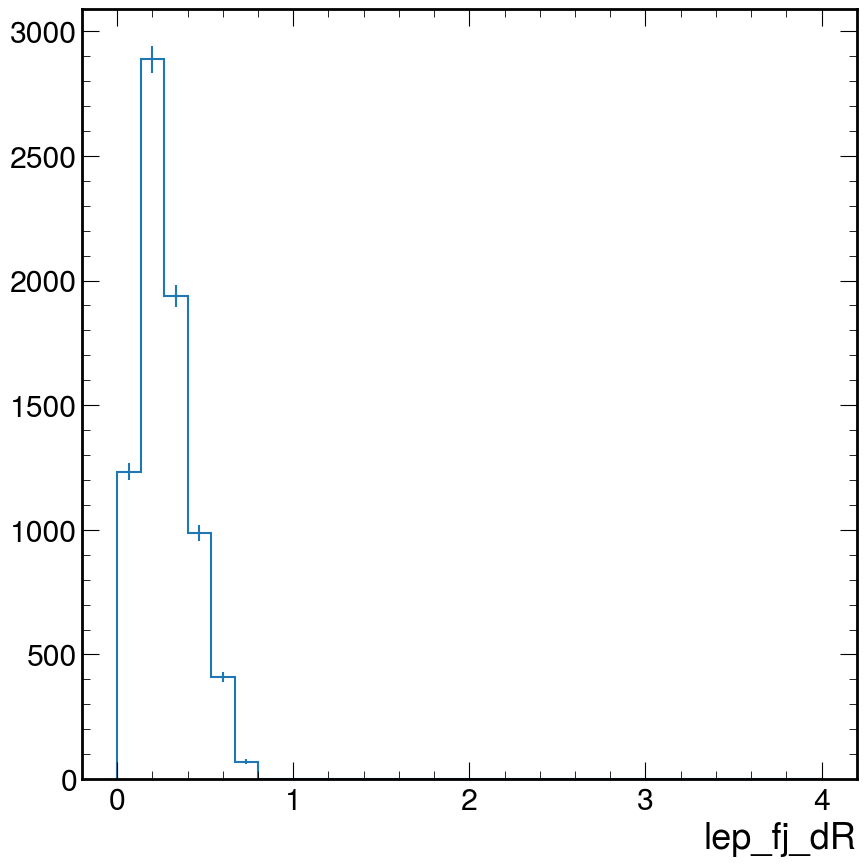

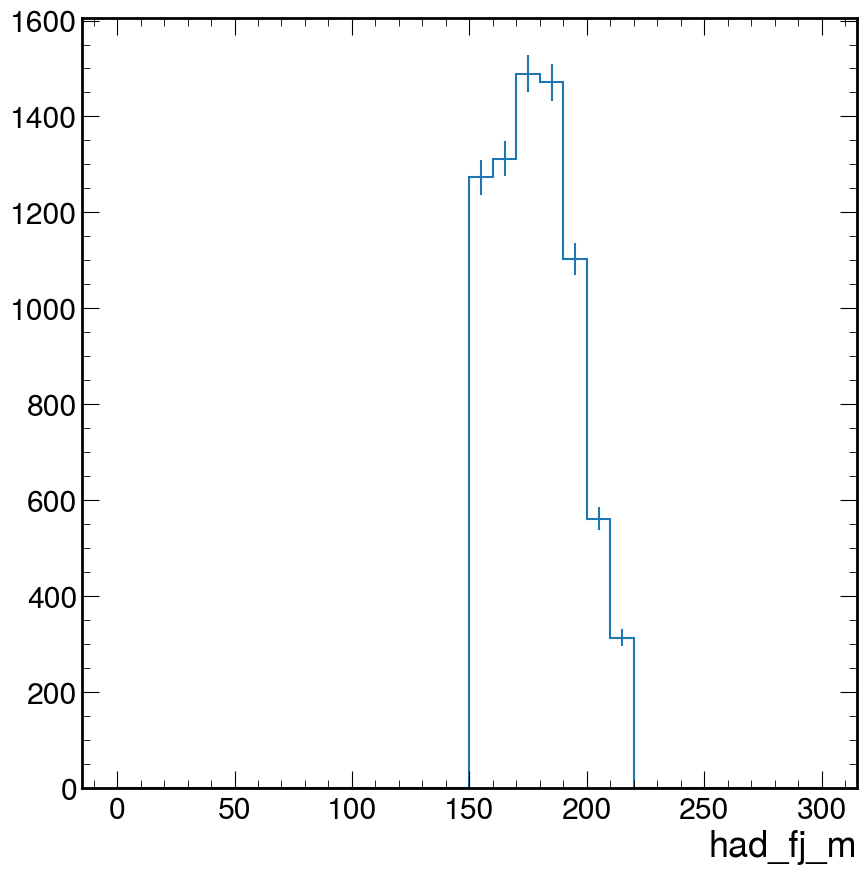

In [34]:
h = {}

h['lep_fj_dR'] = Hist.new.Regular(30, 0, 4, name="lep_fj_dR").Double()

h['had_fj_m'] = Hist.new.Regular(30, 0, 300, name="had_fj_m").Double()

h['lep_fj_dR'].fill(combined_df['lep_fatjet_dR'])

h['had_fj_m'].fill(combined_df['had_fatjetMass'])

hep.histplot(h['lep_fj_dR'])
plt.show()

hep.histplot(h['had_fj_m'])
plt.show()
